In [3]:
import FinanceDataReader as fdr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pmdarima.arima import ndiffs
import pmdarima as pm

<AxesSubplot:xlabel='Date'>

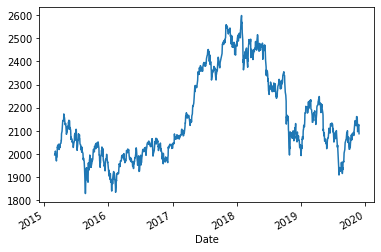

In [4]:
df = fdr.DataReader('KS11','2015-3','2019-12')
df.Close.plot()

In [5]:
df['Range'] = df['Close'].diff().fillna(0)
df

,Close,Open,High,Low,Volume,Change,Range
Date,,,,,,,
2015-03-02,1996.81,1996.72,1999.13,1988.33,373370000.0,0.0055,0.00
2015-03-03,2001.38,2002.50,2003.05,1995.93,444860000.0,0.0023,4.57
2015-03-04,1998.29,2001.76,2003.85,1996.50,374540000.0,-0.0015,-3.09
2015-03-05,1998.38,1996.81,2002.48,1993.92,373680000.0,0.0000,0.09
2015-03-06,2012.94,2003.97,2013.73,2003.18,393350000.0,0.0073,14.56
...,...,...,...,...,...,...,...
2019-11-25,2123.50,2117.14,2130.04,2116.07,397680000.0,0.0102,21.54
2019-11-26,2121.35,2129.27,2139.64,2120.85,532600000.0,-0.0010,-2.15
2019-11-27,2127.85,2134.47,2136.30,2118.07,367800000.0,0.0031,6.50


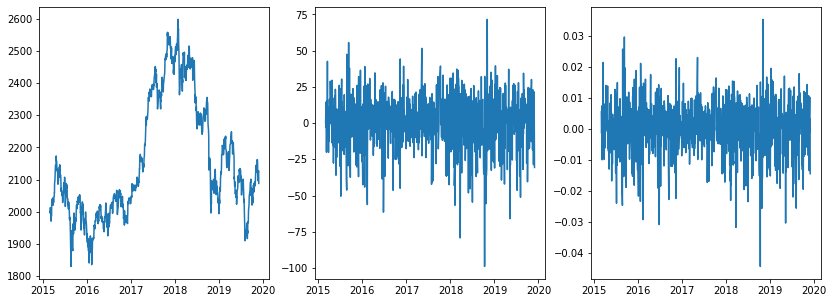

In [6]:
plt.figure(figsize=(14,5))
plt.subplot(1,3,1)
plt.plot(df.Close)
plt.subplot(1,3,2)
plt.plot(df.Range)
plt.subplot(1,3,3)
plt.plot(df.Change)
plt.show()

In [7]:
pd.DataFrame(df.Range).T

Date,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,...,2019-11-18,2019-11-19,2019-11-20,2019-11-21,2019-11-22,2019-11-25,2019-11-26,2019-11-27,2019-11-28,2019-11-29
Range,0.0,4.57,-3.09,0.09,14.56,-20.12,-8.05,-3.94,-10.24,15.2,...,-1.49,-7.45,-27.92,-28.72,5.36,21.54,-2.15,6.5,-9.25,-30.64


In [8]:
df_2 = fdr.DataReader('KS11','2020-01','2022-03')
a = ['Close','Volume','Change']
df_2[a]

,Close,Volume,Change
Date,,,
2020-01-02,2175.17,494680000.0,-0.0102
2020-01-03,2176.46,631560000.0,0.0006
2020-01-06,2155.07,592670000.0,-0.0098
2020-01-07,2175.54,568240000.0,0.0095
2020-01-08,2151.31,913830000.0,-0.0111
...,...,...,...
2022-02-22,2706.79,648400000.0,-0.0135
2022-02-23,2719.53,537840000.0,0.0047
2022-02-24,2648.80,926400000.0,-0.0260


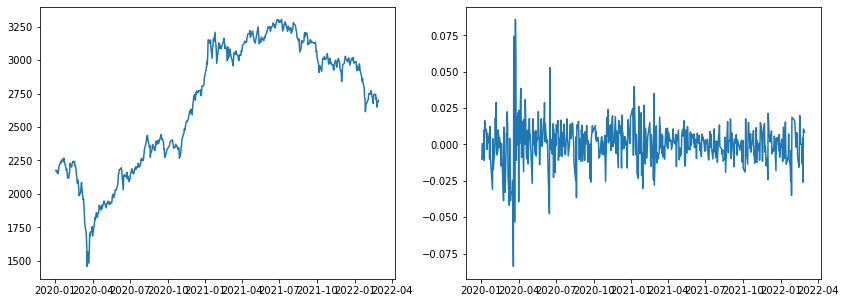

In [9]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(df_2.Close)
plt.subplot(1,2,2)
plt.plot(df_2.Change)
plt.show()

In [10]:
df_2.Change.describe()

count    534.000000
mean       0.000493
std        0.014444
min       -0.083900
25%       -0.007175
50%        0.001250
75%        0.008000
max        0.086000
Name: Change, dtype: float64

In [11]:
df_2.Change.sort_values(ascending=True)

Date
2020-03-19   -0.0839
2020-03-23   -0.0534
2020-03-18   -0.0486
2020-06-15   -0.0476
2020-03-09   -0.0419
               ...  
2021-01-08    0.0397
2020-06-16    0.0528
2020-03-25    0.0589
2020-03-20    0.0744
2020-03-24    0.0860
Name: Change, Length: 534, dtype: float64

In [12]:
df_2['Change'].idxmax()

Timestamp('2020-03-24 00:00:00')

In [13]:
df_2['Volume'].idxmax()

Timestamp('2021-02-19 00:00:00')

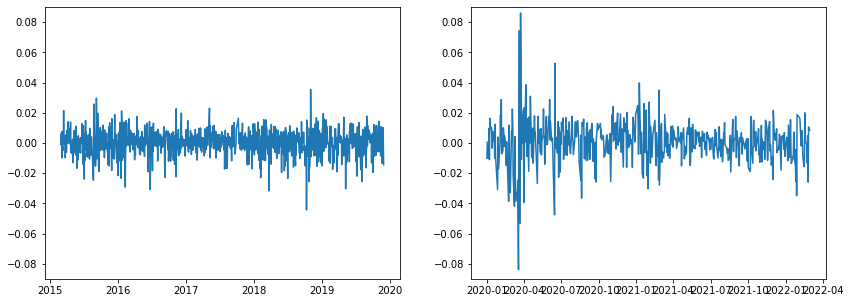

In [14]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.ylim([-0.09, 0.09])     # Y축의 범위: [ymin, ymax]
plt.plot(df.Change)
plt.subplot(1,2,2)
plt.ylim([-0.09, 0.09])     # Y축의 범위: [ymin, ymax]
plt.plot(df_2.Change)
plt.show()